# AlphaZero Algorithm - Testing

This notebook was built to conduct experiences on the AlphaZero Algorithm and better understand its implementation details

# Import libraries / modules

In [1]:
# Python libraries
import time

# z3rd party libraries
import matplotlib.pyplot as plt
import numpy as np

# Game-related libraries
import games_mod # Games
import policy_mod # neural network
from play_mod import Play
import training_mod
from game_utils import DotDict, policy_player_mcts, random_player, match_ai, policy_player_network_only

# Game, Training and Play Settings

In [2]:
# Game settings
game_settings = DotDict({
    "board_size": (3,3),
    "N": 3
})

# Self-play training settings
game_training_settings = DotDict({
    "comp_interval":1000,
    "episods": 300,
    "self_play_iterations": 50,
    "explore_steps": 2,
    "temp_threshold": [40, 0.01]
})

# temp_threshold: [x,y] means "up to x episods, applies y temperature"

# neural network settings
nn_training_settings = DotDict({
    "load_policy": False,
    "ai_ckp": "",
    "lr": .01, 
    "weight_decay": 1.e-4,
    "training_steps":30,
    "buffer_size":1500,
    "batch_size": 20
})

# play settings
play_settings = DotDict({
    "explore_steps": 50,
    "temperature": 0.01                         
})

buffer_size = nn_training_settings.buffer_size
batch_size = nn_training_settings.batch_size

# Training the AI

In [3]:
from replay_buffer import ReplayBuffer
game=games_mod.ConnectN(game_settings)
policy = policy_mod.Policy(nn_training_settings)
buffer = ReplayBuffer(buffer_size, batch_size)

In [4]:
alpha_0 = training_mod.AlphaZeroTraining(
    game_settings, 
    game_training_settings, 
    nn_training_settings, 
    policy)

losses_list = alpha_0.training_pipeline(buffer)

KeyboardInterrupt: 

In [ ]:
plt.plot(losses_list)
plt.show()

In [ ]:
import torch
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
game_state1 = np.array([[-1, 1, -1], [0, 1, 0], [0, 0, 0]])
frame1 = torch.tensor(game_state1, dtype=torch.float, device=device).unsqueeze(0)
game_state2 = np.array([[-1, 1, -1], [0, 1, -1], [0, 0, 0]])
frame2 = torch.tensor(game_state2, dtype=torch.float, device=device).unsqueeze(0)
new_tensor = torch.stack((frame1, frame2))
new_tensor.shape

In [ ]:
v, p = policy.forward_batch(new_tensor)

In [ ]:
p

In [ ]:
print (p.detach().numpy()[1][7])

In [9]:
import torch
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
game_state = np.array(
    [[-1, 0 ,0],
    [0.0, 1.0 ,0],
    [0.0, 0.0 ,-1]])
frame = torch.tensor(game_state, dtype=torch.float, device=device)
x1 = frame.unsqueeze(0).unsqueeze(0)
print (x1.shape)
'''
game_state2 = np.array(
    [[-1, 1 ,-1],
    [0, 1 ,-1],
    [0, 0 ,0]])
frame2 = torch.tensor(game_state2, dtype=torch.float, device=device)
x2 = frame2.unsqueeze(0).unsqueeze(0)
'''

torch.Size([1, 1, 3, 3])


'\ngame_state2 = np.array(\n    [[-1, 1 ,-1],\n    [0, 1 ,-1],\n    [0, 0 ,0]])\nframe2 = torch.tensor(game_state2, dtype=torch.float, device=device)\nx2 = frame2.unsqueeze(0).unsqueeze(0)\n'

In [10]:
policy_path="ai_ckp.pth"
policy = policy_mod.Policy()
policy.load_weights(policy_path)
v, p = policy.forward_batch (x1)
print ("Probability = {}, v = {}".format(p,v))

'''
p, v = policy (x2)
print ("Probability = {}, v = {}".format(p,v))
'''

Probability = tensor([[ 9.2551e-12,  2.0878e-01,  9.5939e-02,  1.6895e-01,  4.7704e-11,
          2.0316e-01,  1.2208e-01,  2.0108e-01,  1.1291e-11]]), v = tensor(1.00000e-02 *
       [[-2.3251]])


'\np, v = policy (x2)\nprint ("Probability = {}, v = {}".format(p,v))\n'

In [ ]:
count1 = 0
count2 = 0

test1 = np.array(
        [[0.0, 0.0 ,0],
        [0, 0 ,0],
        [0, 0 ,0]])

test2 = np.array([[0, 0 ,0],[0, 0 ,0], [0, 0 ,-1]])

In [ ]:
for state, v, p in buffer.memory:
    if np.array_equal(state.astype(int), test1.astype(int)):
        count1 +=1
    if np.array_equal(state.astype(int), test2.astype(int)):
        count2 +=1

In [ ]:
count1, count2

In [ ]:
len(buffer.memory)

## Buffer Distribution

In [ ]:
from test1 import test_final_positions
test_final_positions(buffer)

In [ ]:
states_list = []
states_count = {}
count = 0
for state, _, _ in buffer.memory:
    count +=1
    found = False
    state = state.astype(int)
    
    for j in range(len(states_list)):        
        if np.array_equal(state, states_list[j]):
            found = True
            idx_state = j
            break
    if found:
        states_count[j] +=1
    else:
        states_count[len(states_list)] = 1
        states_list.append(state)
    if count > 2000:
        break

In [ ]:
len(states_list)

In [ ]:
print(sorted(states_count.items(), key = 
             lambda kv:(kv[1], kv[0]), reverse = True)[:200])    


## Manual testing

In [ ]:
game_state1 = np.array([[1, 1, -1], [-1, 1, -1], [0, 0, 0]])
frame1 = torch.tensor(game_state1, dtype=torch.float, device=device).unsqueeze(0)
game_state2 = np.array([[0, 0, 0], [0, 0, 0], [0, 0, 0]])
frame2 = torch.tensor(game_state2, dtype=torch.float, device=device).unsqueeze(0)


policy_path = "ai_ckp.pth"
policy = policy_mod.Policy()
policy.load_weights(policy_path)

new_tensor = torch.stack((frame1, frame2))
v, p = policy.forward_batch(new_tensor)

In [ ]:
v, p

<IPython.core.display.Javascript object>


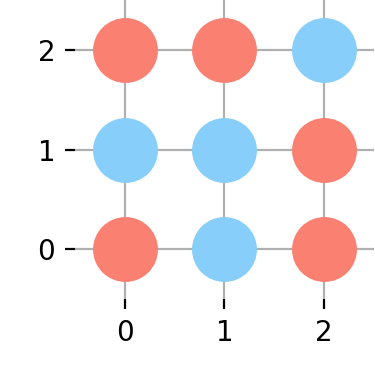

In [5]:
%matplotlib notebook
gameplay=Play(games_mod.ConnectN(game_settings), 
              player2=policy_player_network_only, 
              player1=policy_player_mcts,
              play_settings = play_settings,
              visual = True)

## Self-Play Competition

In [3]:
total_wins, total_losses = match_ai(game_settings, play_settings, total_rounds = 100)

Total wins / losses of Player 1 : 0 / 0


In [15]:
game=games_mod.ConnectN(game_settings)

In [20]:
res = policy_player_mcts (game, play_settings, policy_path="ai_ckp.pth")

In [21]:
res

(0, 2)

In [26]:
res_network = policy_player_network_only (game, play_settings, policy_path="ai_ckp.pth")

In [27]:
res_network

(0, 2)

In [7]:
import torch
torch.cuda.is_available()

False